In [2]:
%matplotlib inline

import json
import pandas as pd
import numpy as np

import sys
import os
sys.path.append(os.path.abspath('../'))
from utils import results_heatmap

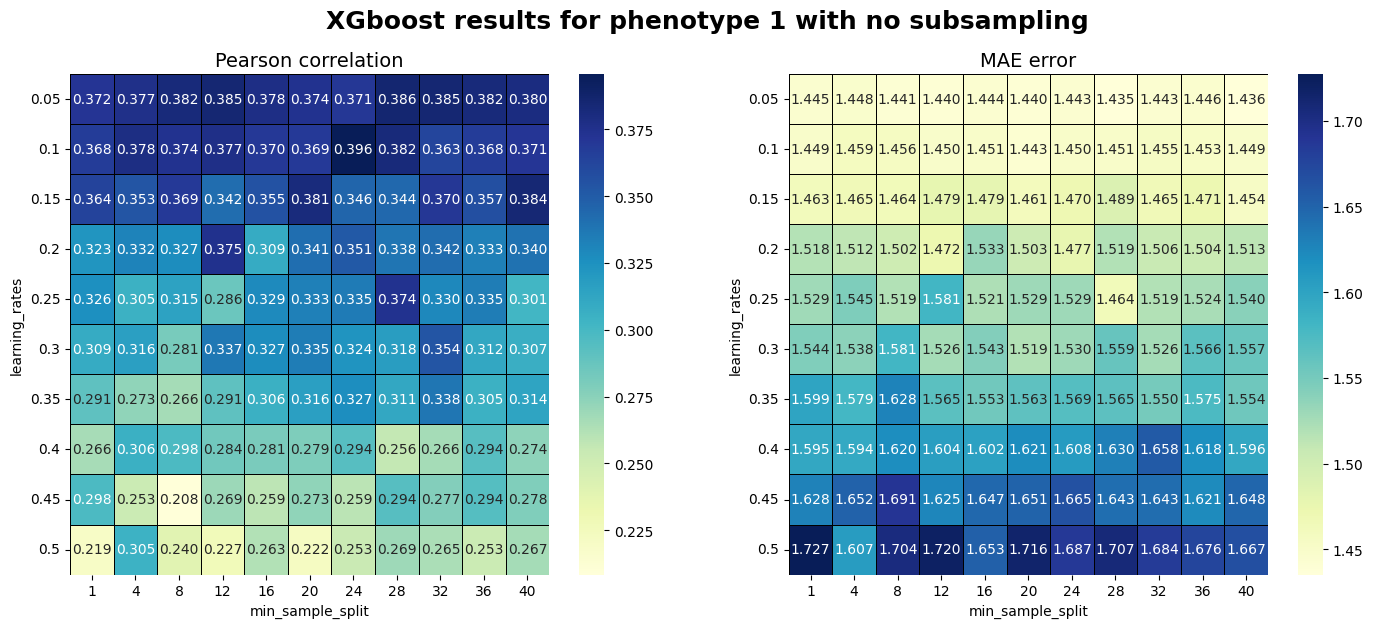

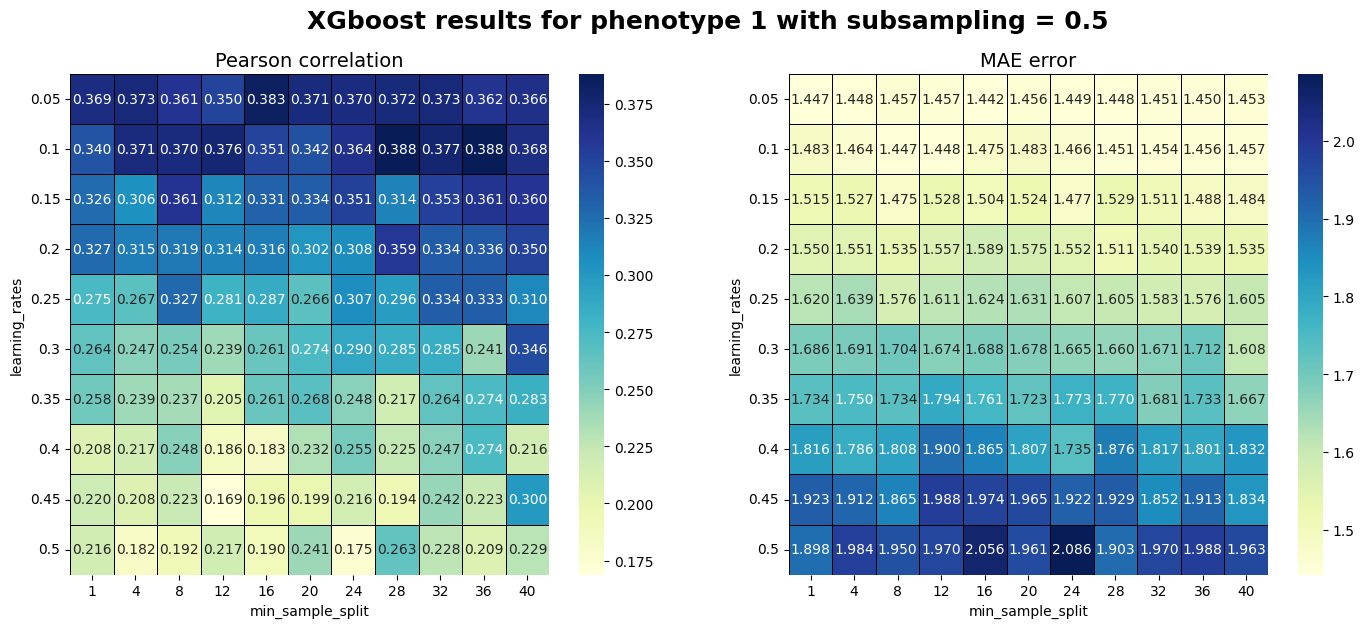

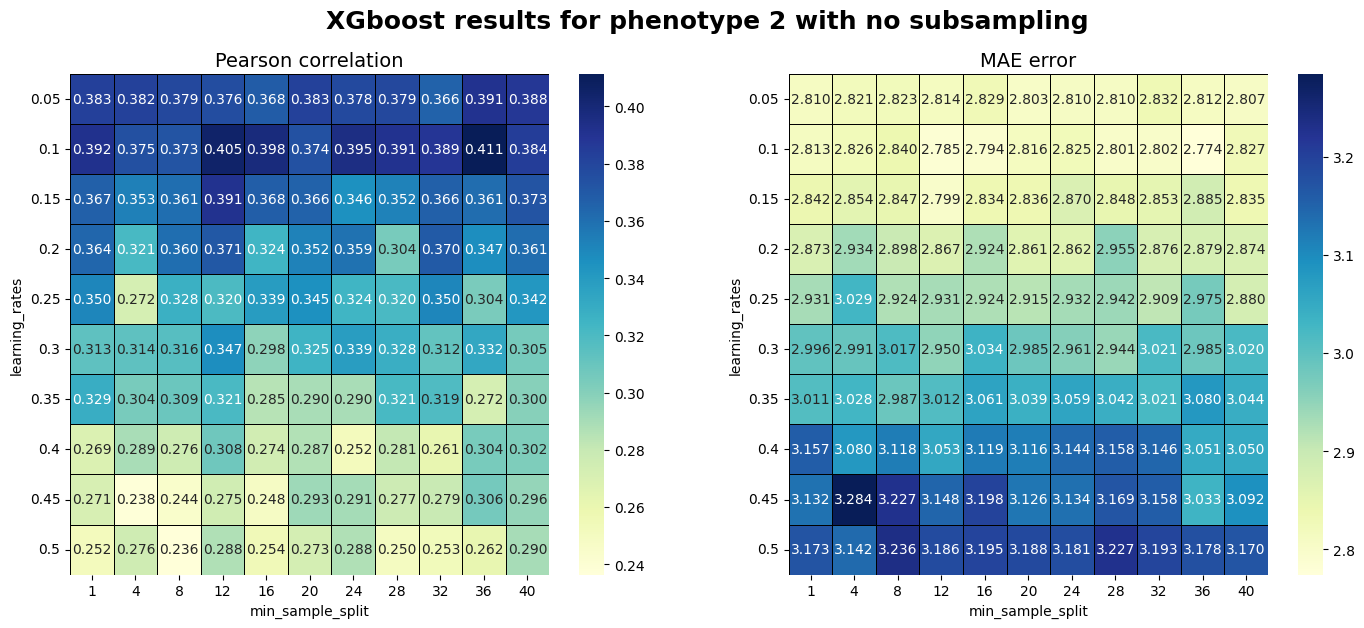

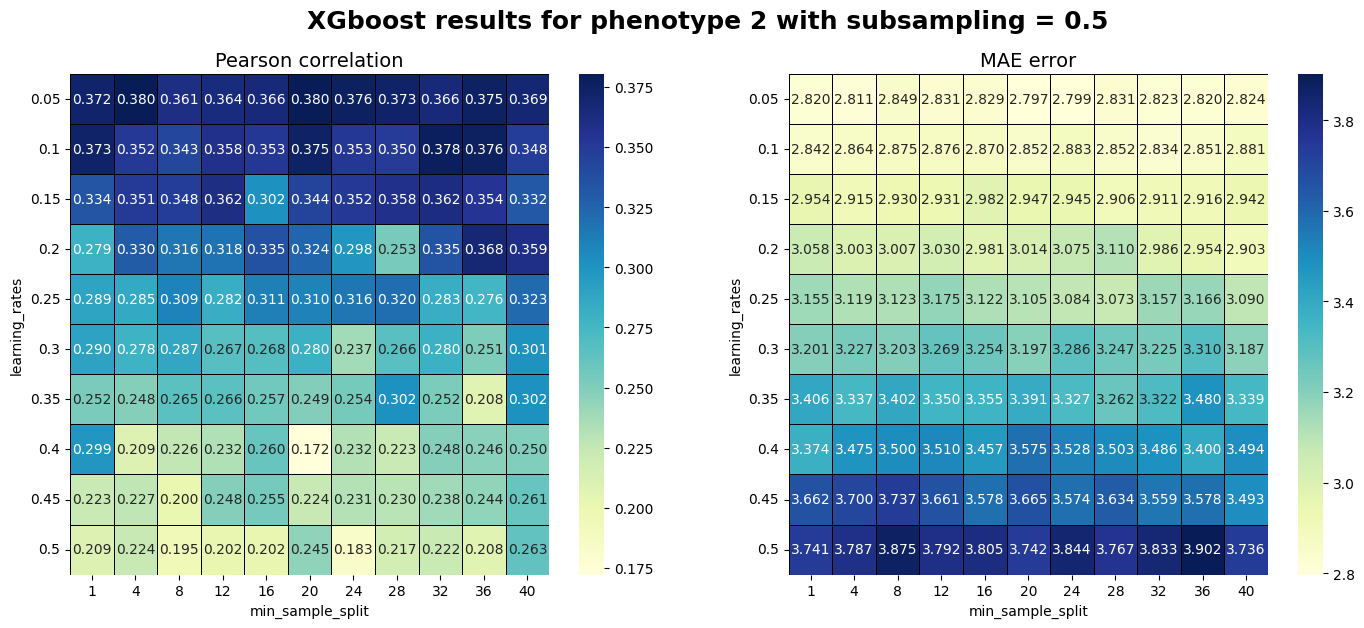

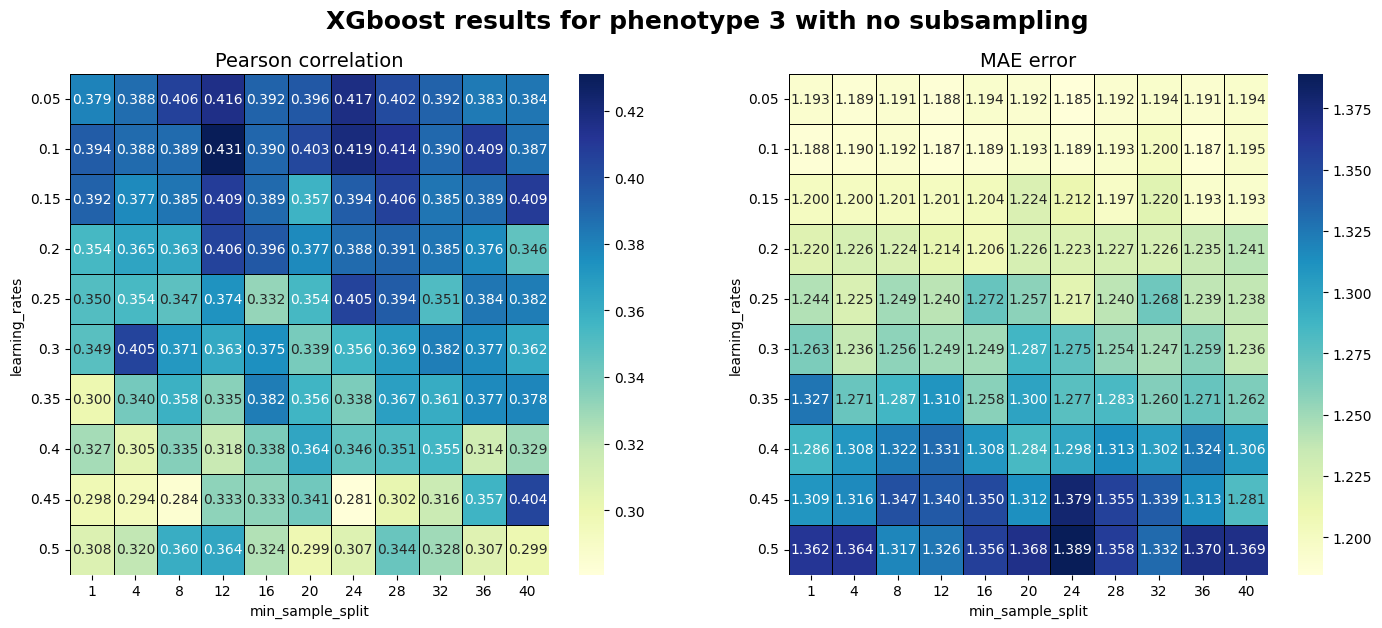

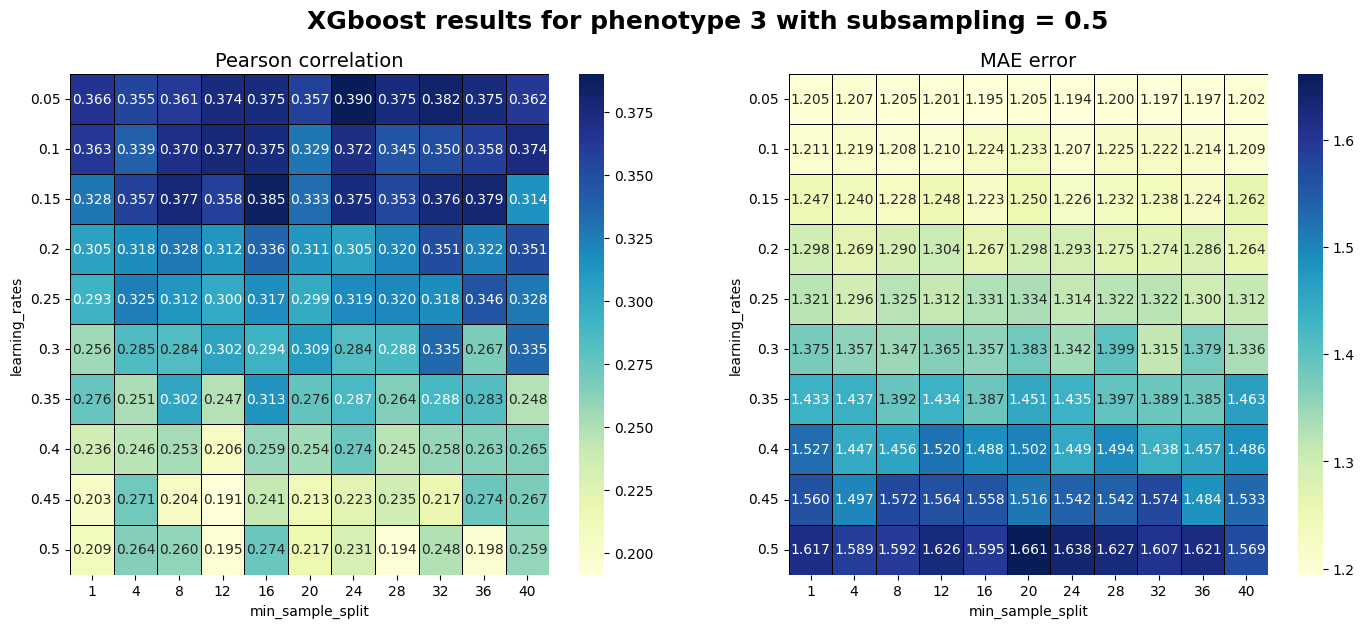

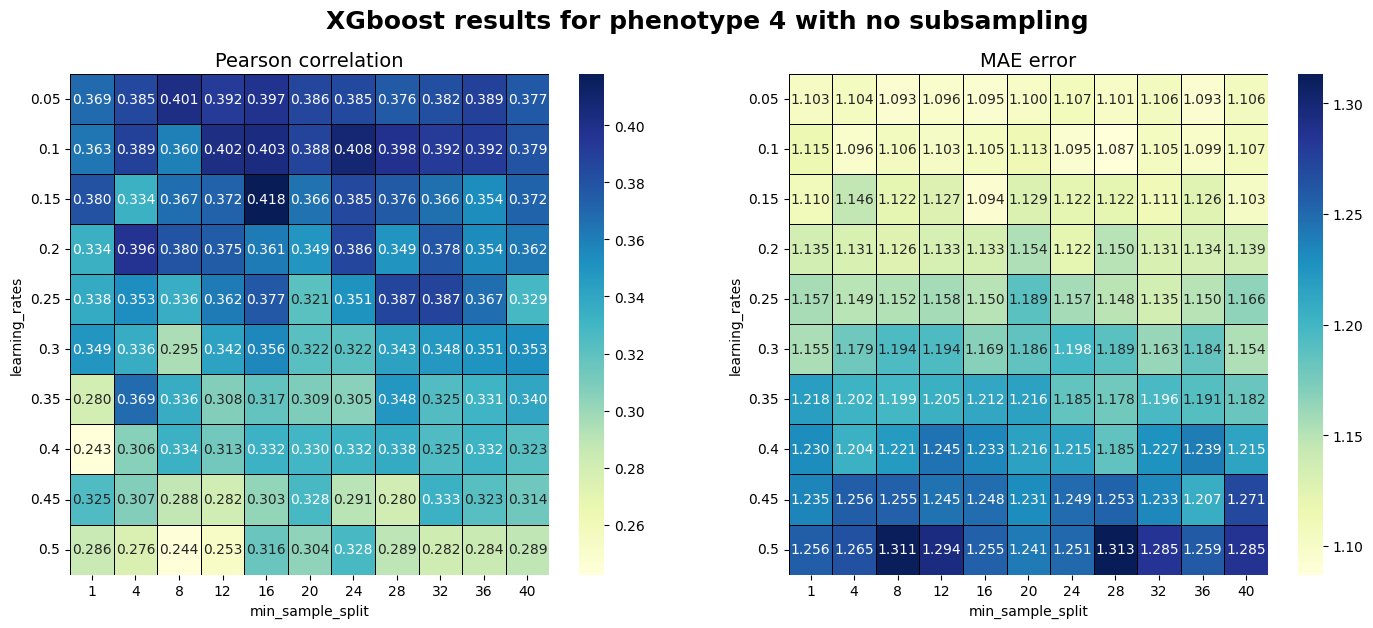

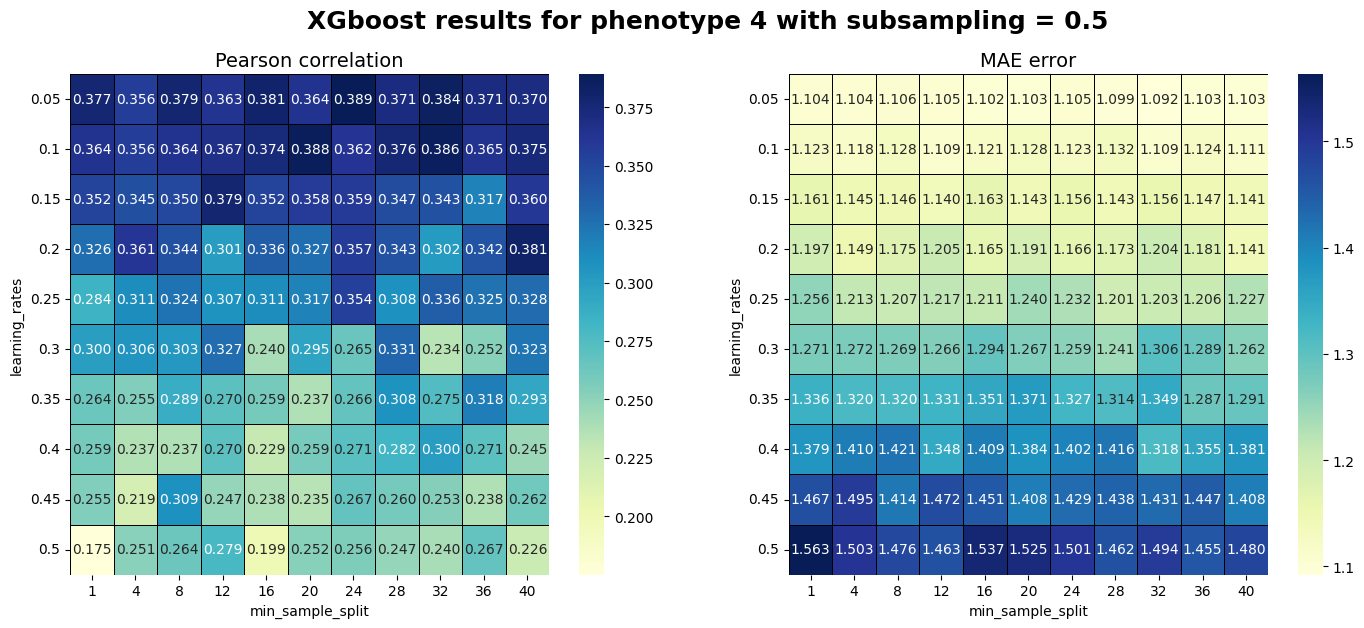

In [9]:
with open("../Results/xgboost_all_100_results.json", "r") as f:
    results = json.load(f)

for i in range(len(results["dim_0_values"])):
    for j, sub_sampling_value in enumerate(results["dim_1_values"]):
        if sub_sampling_value == 1.0:
            title_suffix = "no subsampling"
        else:
            title_suffix = f"subsampling = {sub_sampling_value}"

        corr_df = pd.DataFrame(np.array(results["correlation"])[i,j], index= results["dim_2_values"], columns= results["dim_3_values"]).sort_index()
        MAE_df = pd.DataFrame(np.array(results["MAE"])[i,j], index= results["dim_2_values"], columns= results["dim_3_values"]).sort_index()

        results_heatmap(corr_df, MAE_df, f"XGboost results for phenotype {i + 1} with " + title_suffix, "Pearson correlation", "MAE error", results["dim_3_label"],  results["dim_2_label"])

---

# Second round of experimentations
The sorted version of the dataset was used and the following modification where introduced:
- Use of max_depth instead of min_sample_split for the tree pruning
- Set the number of estimators to 1000
- Update the range of learning rate to include smaller values

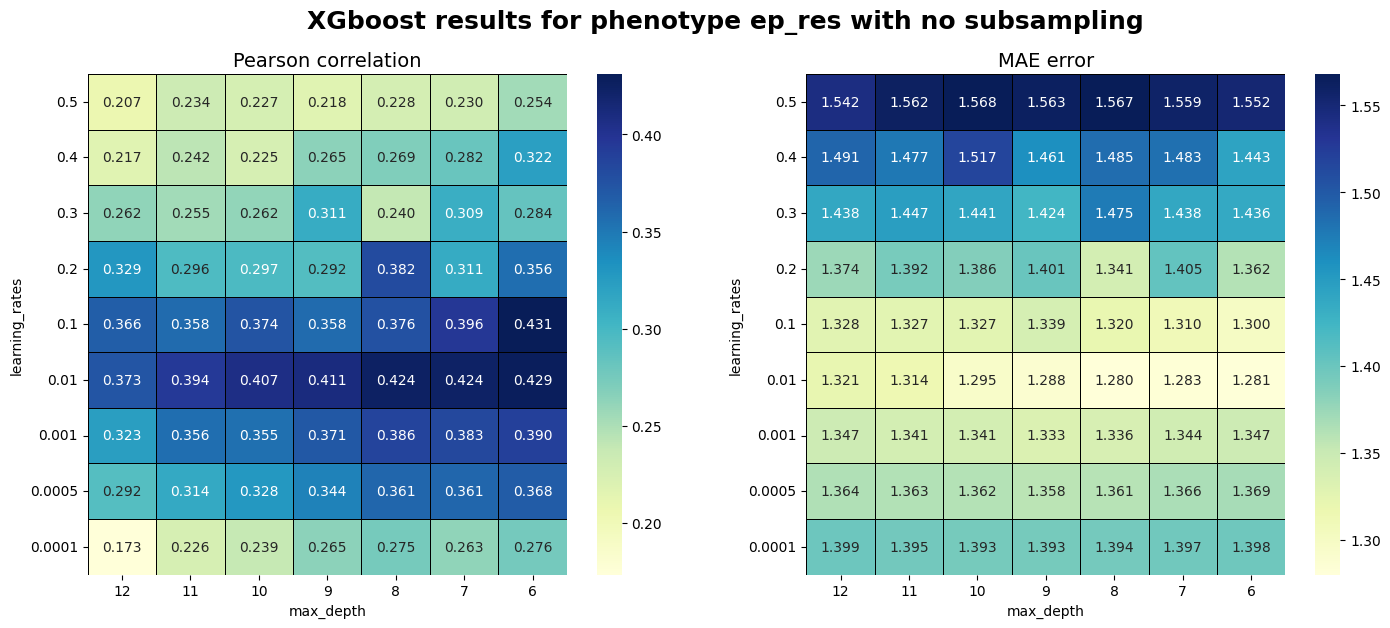

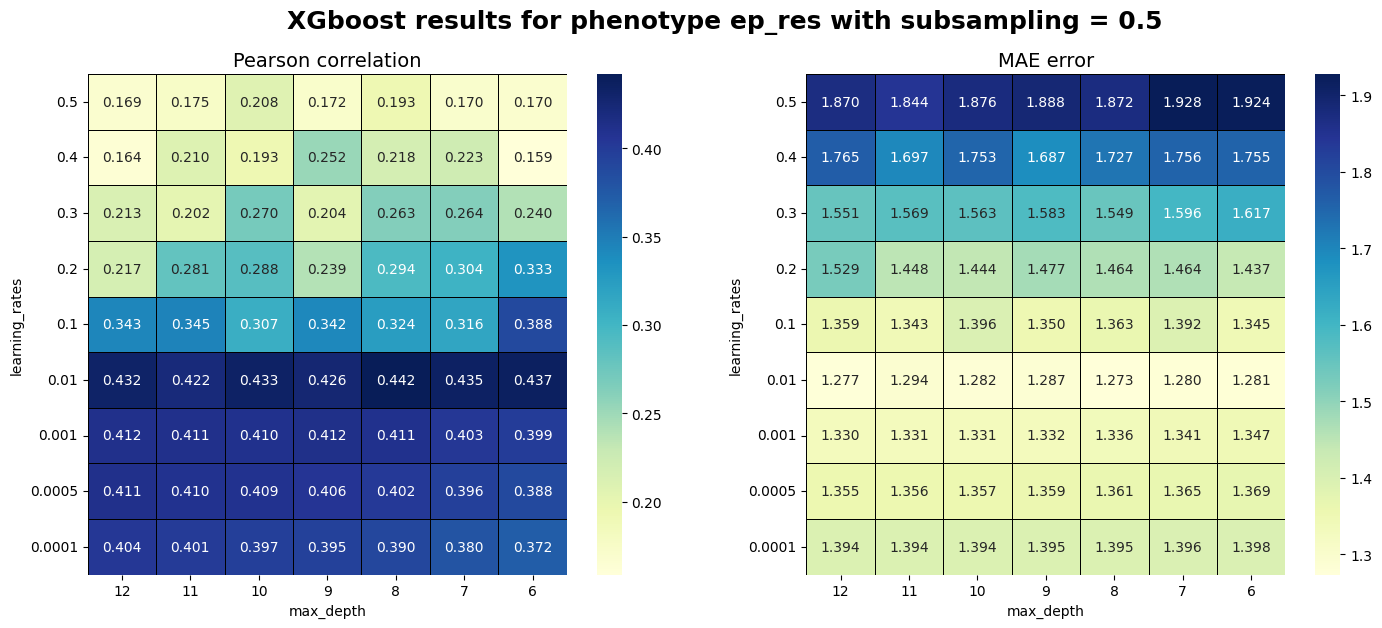

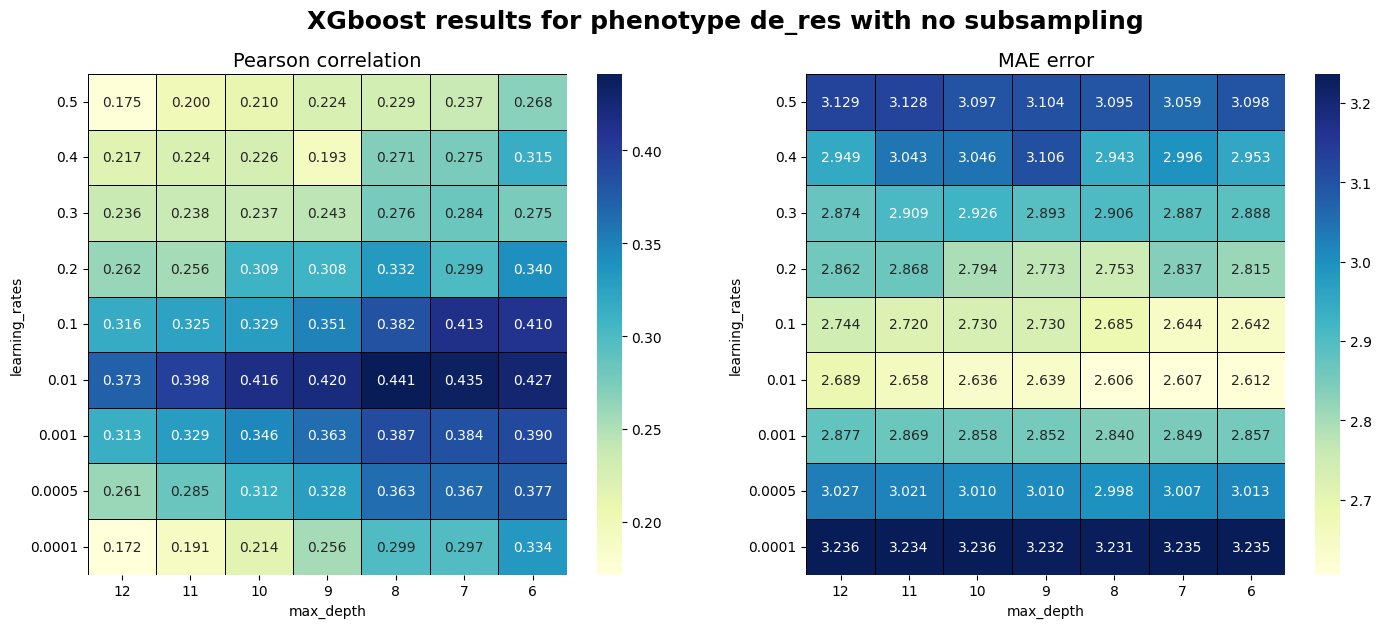

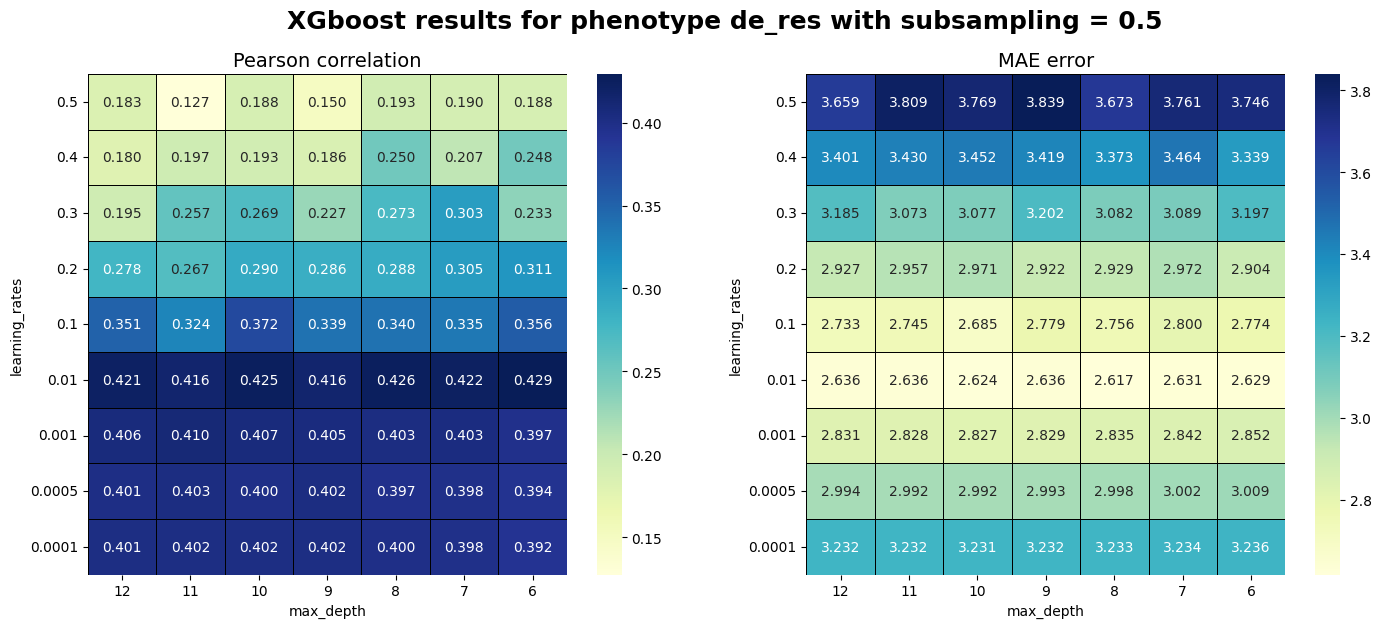

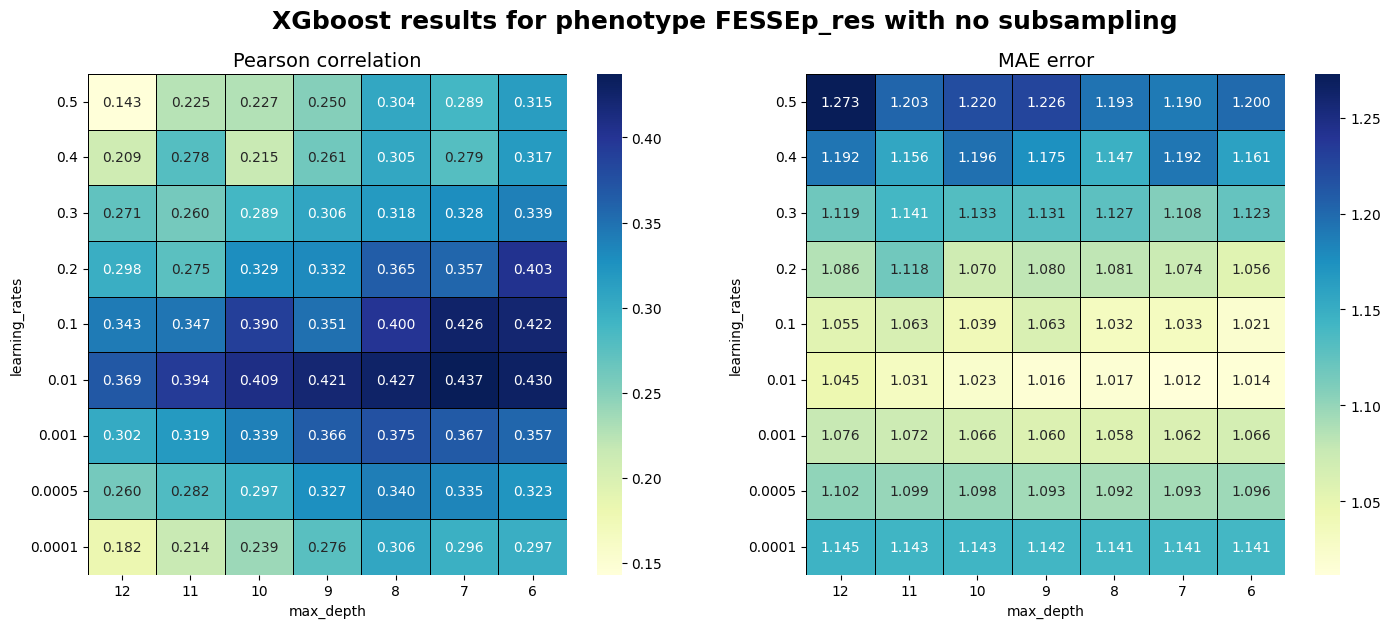

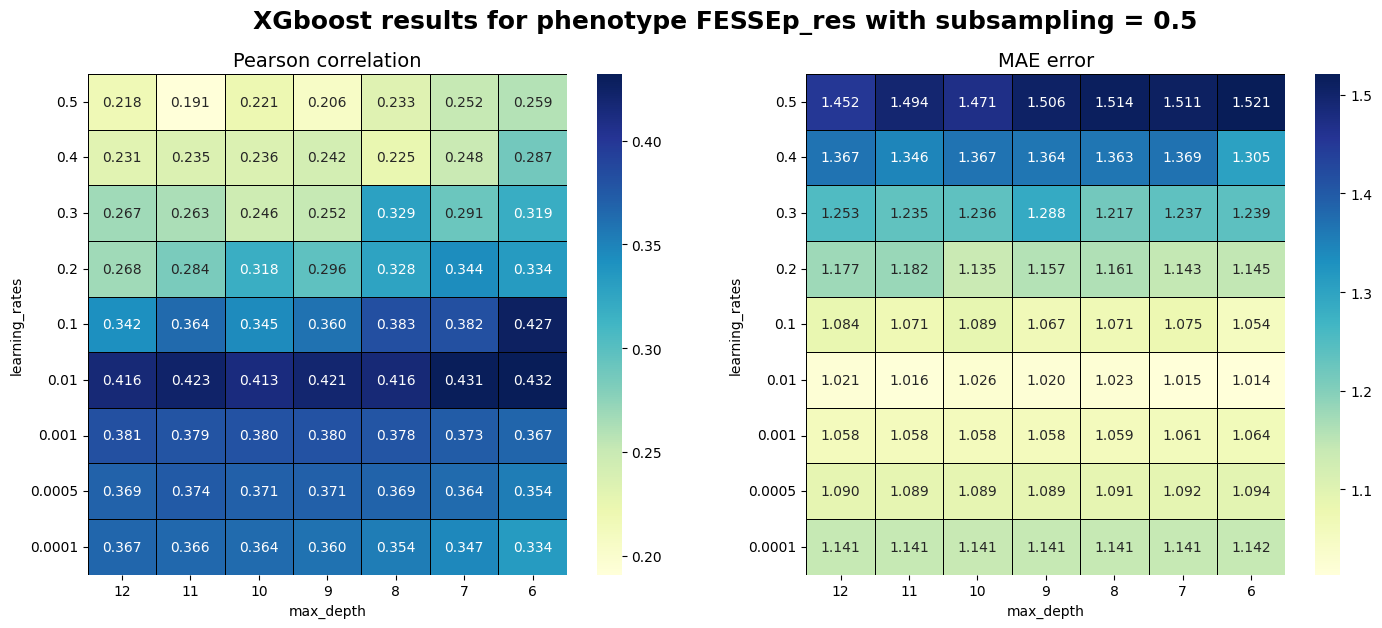

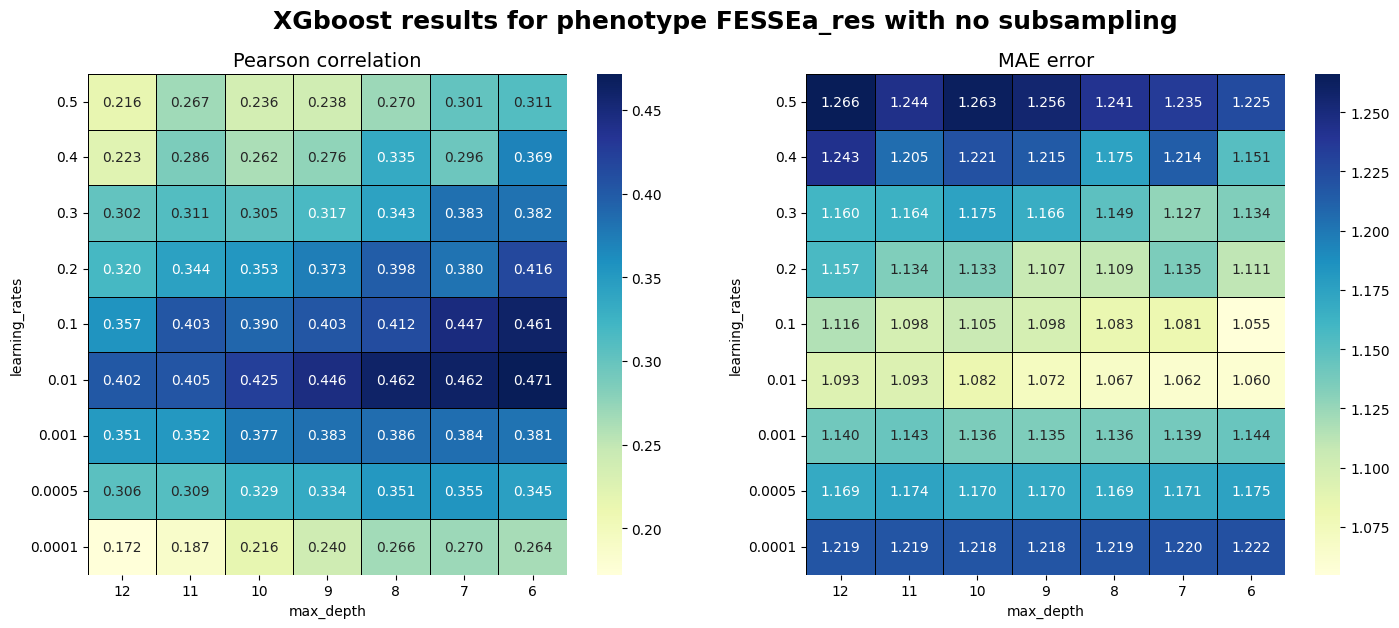

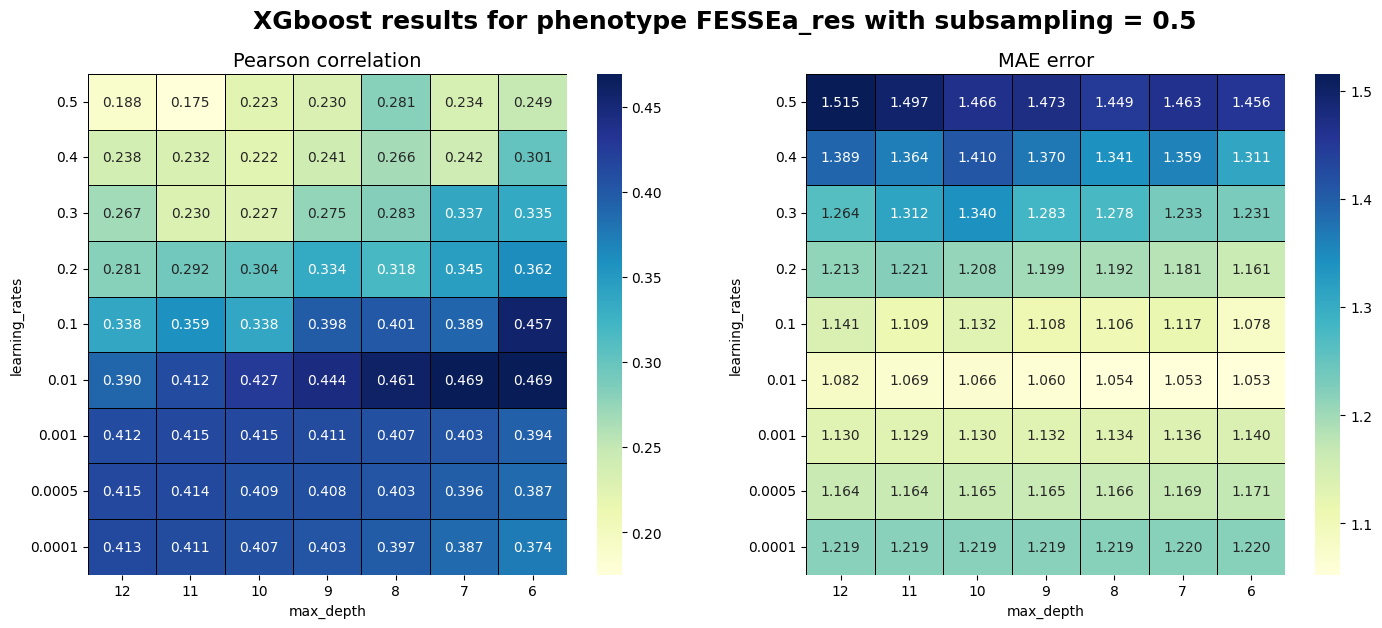

In [8]:
with open("../Results/xgboost_all_1000_results.json", "r") as f:
    results = json.load(f)

for i in range(len(results["dim_0_values"])):
    for j, sub_sampling_value in enumerate(results["dim_1_values"]):
        if sub_sampling_value == 1.0:
            title_suffix = "no subsampling"
        else:
            title_suffix = f"subsampling = {sub_sampling_value}"

        corr_df = pd.DataFrame(np.array(results["correlation"])[i,j], index= results["dim_2_values"], columns= results["dim_3_values"])
        MAE_df = pd.DataFrame(np.array(results["MAE"])[i,j], index= results["dim_2_values"], columns= results["dim_3_values"])

        results_heatmap(corr_df, MAE_df, f"XGboost results for phenotype {results['dim_0_values'][i]} with " + title_suffix, "Pearson correlation", "MAE error", results["dim_3_label"],  results["dim_2_label"])

## Analysis
1. **es_res/phenotype 1:** Better results in both metrics obtained in the second version. A slight improvement is obtain using subsampling.
2. **de_res/phenotype 2:** Better results in both metrics obtained in the second version. Using subsampling didn't help to improve the results, they stays at the same level/ slightly worse than without subsampling.
3. **FESSEp_res/phenotype 3:** Better results for the MAE metrics, not for correlation (due to an outstanding performance in the first version). If we remove this "outlier model" then we see an improvement in the correlation metric for the second round of experiment. Using subsampling didn't help to improve the results, they stays at the same level/ slightly worse than without subsampling.
4. **FESSEa_res/phenotype 4:** Great improvement in the correlation metric, the improvement is slightly less signification for the MAE (but was already low so we cannot expect great variations). Using subsampling doesn't change the correlation but improve by a little the MAE.

**Conclusion :** <br>
The second round of experiment helped obtaining better results. The use of the subsampling helped for some cases but not for all phenotypes.

### Hyper parameter choice discussion:
- n_estimatiors: 1000 is a better choice than 100. There is no reason to modify this value.
- subsampling: due to the mitigated improvement obtained thanks to subsampling, this choice may be not optimal.
- learning_rate: the updated range of value is interesting as we see clearly the "minima" between the overfitting and underfitting.
- max_depth: the range seems not perfectly calibrated, shifting the range to the lower values seems more apropriate as we don't see the underfitting part while seeing a lot of the overfitting influance.